In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [44]:
# data loading
data = loadmat('data2.mat')
X = data['X']
y = data['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,train_size=0.7,test_size=0.3)
# X_val = data['Xval']
# y_val = data['yval']

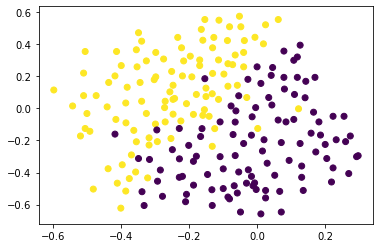

In [38]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())

In [39]:
model=svm.SVC(C=1,kernel='rbf',gamma=100,decision_function_shape='ovo')
model.fit(X_train,y_train.ravel())

SVC(C=1, decision_function_shape='ovo', gamma=100)

In [40]:
def plot_predict(model,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = model.predict(X).reshape(x0.shape)
    y_decision = model.decision_function(X).reshape(x0.shape)
    plt.contour(x0,x1,y_pred,cmap=plt.cm.winter)
    plt.contour(x0,x1,y_decision,cmap=plt.cm.winter,alpha=0.2)

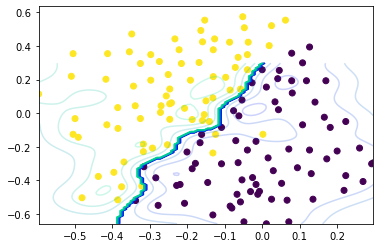

In [41]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.flatten())
plot_predict(model,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [36]:
y_pred = (model.predict(X_test).reshape(-1, 1))
acc = np.sum(y_pred==y_test)/y_test.shape[0]
print('val_acc:',acc)

val_acc: 0.890625
